In [1]:
import os
os.getcwd()

'/home/ginger/Projects/Learning/P_Stack/file_tools/pdf_tools'

In [1]:
print("helloworld")

helloworld


# <center>fitz</center>

In [1]:
import os
import fitz 
# file_name = "比音勒芬.PDF"
# file_name = "天科股份2017年年度报告摘要.pdf"
# file_name = "年度报告多页.pdf"
# file_name = "深圳广田集团股份有限公司 2018 年年度报告摘要.PDF"
# file_name = "20190713_国泰君安_宏观周报_ 信用流向地产和基建，制造业内外交困_花长春 韩旭 董琦 赵格格.pdf"
# full_path = os.getcwd()+"/pdfs/pdf_catas/"+file_name

file_name = "无人驾驶-有图片图表.pdf"
# file_name = "表格重要元素测试i文档.pdf"
full_path = os.getcwd()+"/pdfs/"+ file_name
doc = fitz.open(full_path)

In [4]:
fitz.Identity

IdentityMatrix(1.0, 0.0, 0.0, 1.0, 0.0, 0.0)

In [29]:
file_name = "PDF文档含有批注及修订痕迹.pdf"
full_path = os.getcwd()+"/pdfs/"+file_name
anno_doc = fitz.open(full_path)
page = anno_doc[0]
# for annot in page.links():
#     print(annot)
pix = page.getPixmap(alpha = False,annots=False)  # render page to an image
pix.writePNG("page-%i.png" % page.number)  # store image as a PNG

### 矢量图

In [7]:
page = doc[4]
d = page.getText("dict")
blocks = d["blocks"]
imgblocks = [b for b in blocks if b["type"] == 1]
# imgblocks

3\xea4\xbbEJ*\x89Kr\x83\x19\xab\xfe.\xac\xf6\xa3\xdf\x1f \xdc\x90\x1bf\x97:t\xe8Pbb\xa2\xf5\xe39N\xe02Dz\xb3\x16.O37\x0fi?}5\x01\xed\xcd\xe6\x92\xdc\x88x\xd7\xe1\x88m\x04\xd9uh\xee\xc8\x10\xf7x\x8f\x00\xe5\x86\xaf\xaf5\xb2]\x87\xaf\xb9\xe1\x94\xeb\xa8\xa2\xda\x11\x00\x00\x00\x00\x00\xf8\x01\xb4#\x00\x00\x00\x00\x00P\x05\xda\x11\x00\x00\x00\x00\x00\xa8\x02\xed\x08\x00\x00\x00\x00\x00T\x81v\x04\x00\x00\x00\x00\x00\xaa@;\x02\x00\x00\x00\x00\x00U\xa0\x1d\x01\x00\x00\x00\x00\x80*\xd0\x8e\x00\x00\x00\x00\x00@\x15hG\x00\x00\x00\x00\x00\xa0\n\xb4#\x00\x00\x00\x00\x00P\x05\xda\x11\x00\x00\x00\x00\x00\xa8\x02\xed\x08\x00\x00\x00\x00\x00T\x81v\x04\x00\x00\x00\x00\x00\xaa@;\x02\x00\x00\x00\x00\x00U\xa0\x1d\x01\x00\x00\x00\x00\x80*\xd0\x8e\x00\x00\x00\x00\x00@\x15hG\x00\x00\x00\x00\x00\xa0\n\xb4#\x00\x00\x00\x00\x00P\x05\xda\x11\x00\x00\x00\x00\x00\xa8\x02\xed\x08\x00\x00\x00\x00\x00T\x81v\x04\x00\x00\x00\x00\x00\xaa@;\x02\x00\x00\x00\x00\x00U\xa0\x1d\x01\x00\x00\x00\x00\x80*\xd0\x8e\x00\x00\x00\x0

In [52]:
doc.layout()  #???

In [43]:
doc.getPageImageList(4)

[[87, 0, 213, 32, 8, 'Indexed', '', 'Image85', 'FlateDecode']]

In [44]:
pix = fitz.Pixmap(doc, 84) 
pix

fitz.Pixmap(DeviceRGB, IRect(0, 0, 213, 32), 0)

In [45]:
pix.writePNG("page-%i.png" % 1)  # store image as a PNG

In [3]:
page = doc[4]
svg = page.getSVGimage(matrix = fitz.Identity) 
open("vec5.svg","w").write(svg)

171787

In [22]:
import re
def matchsth(content,sth):
    zhmodel = re.compile(sth)    
    match = zhmodel.findall(content)
    return match
matchsth(svg,sth=u'[\u4e00-\u9fa5]')

[]

In [4]:
import cairosvg

In [5]:
cairosvg.svg2png(url='vec5.svg', write_to='vec5.png')

#### Alpha Channel 
由于控制图片的透明度

In [1]:
from PIL import Image

In [2]:
image = Image.open("vec5.png")
buffer=[]
for pixel in image.getdata():
    buffer.append((
    pixel[0],
    pixel[1],
    pixel[2],
    # pixel[3]-150,
    ))
image.putdata(buffer)

image.save('vec5_filter.png')

#### todo 对图片裁剪，保留有效部分

In [12]:
im.shape

(1122, 793, 4)

In [1]:
from PIL import Image
import numpy as np
from pylab import *
image = Image.open("./vec5_filter.png")
# for pixel in image.getdata():
#     print(pixel)
im = np.array(image)

In [2]:
def is_black(pixel):
    if pixel[0] == 0 and pixel[1] == 0 and pixel[2] == 0:
        return True

In [4]:
import sys
sys.setrecursionlimit(15000)

def walk(point,regions_x,regions_y,dire="11111111"):
    # print(point)
    # if point in Points:
    #     return 
    if point[0] >= 0 and point[0] < im.shape[0] and point[1]>=0 and point[1] < im.shape[1]:
        pixel = im[point[0],point[1]]
        if not is_black(pixel):
            regions_x.append(point[0])
            regions_y.append(point[1])
            # regions.append(point)
            if dire[0] == "1":
                walk([point[0]+1,point[1]],regions_x,regions_y,dire="10100010")
            # if dire[1] == "1":
            #     walk([point[0]+1,point[1]+1],regions_x,regions_y,dire="01000000",Points=Points)
            if dire[2] == "1":
                walk([point[0],point[1]+1],regions_x,regions_y,dire="10101000")
            # if dire[3] == "1":
            #      walk([point[0]-1,point[1]+1],regions_x,regions_y,dire="00010000",Points=Points)
            if dire[4] == "1":
                walk([point[0]-1,point[1]],regions_x,regions_y,dire="00101010")
            # if dire[5] == "1":
            #     walk([point[0]-1,point[1]-1],regions_x,regions_y,dire="00000010",Points=Points)
            if dire[6] == "1":
                walk([point[0],point[1]-1],regions_x,regions_y,dire="10001010")
            # if dire[7] == "1":
            #     walk([point[0]+1,point[1]-1],regions_x,regions_y,dire="00000001",Points=Points)
def rect_grow(point,rects):
    global regions_x
    global regions_y
    # global Points
    # Points = []
    regions_x = []
    regions_y = []
    walk(point,regions_x=regions_x,regions_y=regions_y)
    if len(regions_x)>0 and len(regions_y)>0:
        min_x = min(regions_x)
        max_x = max(regions_x)
        min_y = min(regions_y)
        max_y = max(regions_y)
        if max_x - min_x > 50 or max_y - min_y >50:
            rects.append([min_x,max_x,min_y,max_y])
    return rects


def is_in_rects(point,rects):
    for rect in rects:
        if point[0]>= rect[0] and point[0]<=rect[1] and point[1] >= rect[2] and point[1] <= rect[3]:
            return True

In [15]:
def search_rect():
    """
    在page页面搜索非背景部分，形成矩形框
    """
    rects = []
    for y in range(0,im.shape[1]):
        for x in range(0,im.shape[0]):
            pixel = im[x,y]
            point = [x,y]
            if not is_black(pixel) and not is_in_rects(point,rects):
                # return pixel,point
                rects = rect_grow(point,rects)
            # if len(rects)>0:
            #     return rects
    return rects
rects = search_rect()

In [7]:
rects

[[189, 525, 95, 672],
 [586, 840, 95, 672],
 [951, 959, 96, 720],
 [48, 182, 98, 359],
 [545, 881, 291, 672]]

In [11]:
sorted(rects,key=lambda x:x[0])

[[48, 182, 98, 359],
 [189, 525, 95, 672],
 [545, 881, 460, 672],
 [629, 797, 139, 672],
 [645, 797, 95, 672],
 [951, 959, 96, 720]]

In [12]:
def overlap(rect,rects):
    """
    rect 是否重叠
    """
    for i in range(len(rects)):
        cur_rect = rects[i]
        if is_in_rects(point=[rect[0],rect[1]],rects=[cur_rect]) or is_in_rects(point=[rect[2],rect[3]],rects=[cur_rect]):
            print("--")
            cur_rect = [min(rect[0],cur_rect[0]),
                        max(rect[1],cur_rect[1]),
                        min(rect[2],cur_rect[2]),
                        max(rect[3],cur_rect[3])]
            return True

def post_rects(rects):
    rects = sorted(rects,key=lambda x:x[0])
    new_rects = []
    for rect in rects:
        if not overlap(rect,new_rects):
            new_rects.append(rect)
    return new_rects

post_rects(rects)

--


[[48, 182, 98, 359],
 [189, 525, 95, 672],
 [629, 797, 139, 672],
 [645, 797, 95, 672],
 [951, 959, 96, 720]]

In [5]:
rect_grow(point=[687, 397],rects=[])

In [14]:
im[600,100] # array([  0,   0,   0, 255], dtype=uint8) black
im[336,285]  # min(数据)变成黑色，max(数据)变成白色

array([255, 255, 255, 255], dtype=uint8)

In [8]:
def crop(rect,im,i):
    crop_im = im[rect[0]:rect[1],rect[2]:rect[3]]
    crop_im = Image.fromarray(crop_im)
    crop_im.save("./imgs/res_%s.png" % i)


In [10]:
crop(rect=[629, 881, 95, 672],im=im,i="res")

In [9]:
for i in range(len(rects)):
    crop(rects[i],im,i)

In [6]:
import numpy as np
from pylab import *
image = Image.open("./vec4_filter.png")
# for pixel in image.getdata():
#     print(pixel)
im = np.array(image)
im.shape


### pdf逐页转为png

In [24]:

# import sys, fitz  # import the binding
# fname = sys.argv[1]  # get filename from command line
# doc = fitz.open(fname)  # open document
for page in doc:  # iterate through the pages
    pix = page.getPixmap(alpha = False)  # render page to an image
    pix.writePNG("page-%i.png" % page.number)  # store image as a PNG

In [13]:
page.rect  # 获取page的矩阵框

Rect(0.0, 0.0, 595.3200073242188, 841.9199829101562)

In [2]:
doc.metadata

{'format': 'PDF 1.4',
 'title': 'Microsoft Word - 测试文档.docx',
 'author': None,
 'subject': None,
 'keywords': None,
 'creator': 'Word',
 'producer': 'macOS Version 10.15.3 (Build 19D76) Quartz PDFContext',
 'creationDate': "D:20200226051640Z00'00'",
 'modDate': "D:20200226051640Z00'00'",
 'encryption': None}

In [12]:
"""
逐页抽取内容
"""
counter = 0
for page in doc:  # iterate the document pages
    counter += 1
    print("page",counter)
    text = page.getText()  # get plain text (is in UTF-8)
    # print(text)

page 1
page 2
page 3
page 4
page 5
page 6
page 7
page 8
page 9
page 10
page 11
page 12
page 13


In [4]:
"""
 get all outlines (also called “bookmarks”) of a document,
 [[lvl, title, page, …], …] 
lvl is the hierarchy level of the entry (starting from 1), title is the entry’s title, and page the page number (1-based!). Other parameters describe details of the bookmark target.
"""

# doc.getToC()

'\n get all outlines (also called “bookmarks”) of a document,\n [[lvl, title, page, …], …] \nlvl is the hierarchy level of the entry (starting from 1), title is the entry’s title, and page the page number (1-based!). Other parameters describe details of the bookmark target.\n'

In [9]:
page0.getText()

'深圳广田集团股份有限公司 2018 年年度报告摘要\n1\n证券代码：002482                      \n证券简称：广田集团\n公告编号：2019-021\n深圳广田集团股份有限公司 2018 年年度报告摘要\n一、重要提示\n本年度报告摘要来自年度报告全文，为全面了解本公司的经营成果、财务状况及未来发展规划，投资者应当到证监会指定媒\n体仔细阅读年度报告全文。\n非标准审计意见提示\n□ 适用 √ 不适用\n董事会审议的报告期普通股利润分配预案或公积金转增股本预案\n√ 适用 □ 不适用\n是否以公积金转增股本\n□ 是 √ 否\n公司经本次董事会审议通过的普通股利润分配预案为：以总股本为基数，向全体股东每 10 股派发现金红利 0.30 元（含税），\n送红股 0 股（含税），不以公积金转增股本。\n董事会决议通过的本报告期优先股利润分配预案\n□ 适用 √ 不适用\n二、公司基本情况\n1、公司简介\n股票简称\n广田集团\n股票代码\n002482\n股票上市交易所\n深圳证券交易所\n联系人和联系方式\n董事会秘书\n证券事务代表\n姓名\n赵国文\n朱凯、李儒谦\n办公地址\n深圳市罗湖区深南东路 2098 号广田集团\n大厦\n深圳市罗湖区深南东路2098号广田集团大\n厦\n电话\n0755-25886666-1187\n0755-25886666-1187\n电子信箱\nzq@szgt.com\nzq@szgt.com\n2、报告期主要业务或产品简介\n（一）报告期内，公司的主营业务及其变化情况\n公司是一家集建筑装饰设计与施工、绿色建材研发生产为一体的大型上市集团企业，主要为大型房地产企业、政府机构、\n大型企业和高档酒店等提供装饰设计和施工服务。公司承接的项目包括公共建筑装饰、住宅精装修等，涵盖星级酒店、商业\n综合体、大型场馆、写字楼、轨道交通、住宅精装修等多种业态类型。\n公司是建筑装饰企业中高等级资质最完备的企业之一，公司及子公司拥有的壹级、甲级资质主要有建筑装修装饰工程专\n业承包壹级、建筑幕墙工程专业承包壹级、机电设备安装工程专业承包壹级、电子与智能化工程专业承包壹级、消防设施工\n程专业承包壹级、建筑装饰工程设计专项甲级、建筑幕墙工程设计专项甲级、建筑智能化系统设计专项甲级、消防设施工程\n设计专项甲级、建

In [58]:
page0

page 0 of /home/ginger/Projects/Learning/P_Stack/pdf_tools/pdfs/pdf_catas/20190713_国泰君安_宏观周报_ 信用流向地产和基建，制造业内外交困_花长春 韩旭 董琦 赵格格.pdf

In [51]:
class Block(object):
    def __init__(self,left_down,right_up, text):
        """left_down = [],right_up = []"""
        self.left_down = left_down
        self.right_up = right_up
        self.text = text

    def get_center(self):
        """"计算block的中心坐标"""
        return [(self.left_down[0]+self.right_up[0])/2,(self.left_down[1]+self.right_up[1])/2]

    def get_width(self):
        return abs(self.left_down[0]-self.right_up[0])
    
    def get_height(self):
        return abs(self.left_down[1]-self.right_up[1])

In [52]:
"""
cluster = [[x,y],[x,y]]
每个区域是一个矩形
矩形的坐标（左下角，右上角）
设置 x_Threshold,y_Threshold
"""
class Cluster(Block):
    def __init__(self,left_down,right_up):
        """left_down = [],right_up = []"""
        self.left_down = left_down
        self.right_up = right_up
        self.texts = []

    def cal_dist(self,block_center):
        cluster_center = self.get_center()
        x_d = abs(cluster_center[0] - block_center[0])
        y_d = abs(cluster_center[1] - block_center[1])
        return [x_d,y_d]

    def add_block(self,block):
        self.left_down = [min(block.left_down[0],self.left_down[0]),min(block.left_down[1],self.left_down[1])]
        self.right_up = [max(block.right_up[0],self.right_up[0]),max(block.right_up[1],self.right_up[1])]
        self.texts.append(block.text)


In [5]:
page0 = doc[2]
fitz_blocks = fitz.utils.getTextBlocks(page0, images=False)
# blocks = []
# for b in fitz_blocks:
#     block = Block(left_down = [b[0],b[1]],
#                     right_up = [b[2],b[3]],
#                     text = b[4])
#     blocks.append(block)
# len(blocks)
fitz_blocks

[(379.8455810546875,
  45.254310607910156,
  519.9281616210938,
  58.55813980102539,
  '源杉数据科技（上海）有限公司',
  0,
  0),
 (222.07057189941406,
  740.7742919921875,
  389.93035888671875,
  754.078125,
  'Copyright Ó源杉 FIR.ai 2020/02/25',
  1,
  0),
 (95.28002166748047,
  73.5525131225586,
  490.8809814453125,
  84.59251403808594,
  '序号 业务需求描述 组件及服务',
  2,
  0),
 (95.28002166748047,
  98.75251770019531,
  417.3262939453125,
  124.19252014160156,
  '1 基于模版创建，定义模版中的每一处填充位置及数据源，在\n控制区域内进行机器填充。包括落款的公司名称及日期。',
  3,
  0),
 (435.8399963378906,
  98.75251770019531,
  521.1104736328125,
  138.35252380371094,
  '见远在线编辑 API\n连接器服务\n填充服务',
  4,
  0),
 (95.28002166748047,
  144.83251953125,
  406.3260498046875,
  170.27252197265625,
  '2 基于模版创建，机器填充后，部分内容为用户内容限制编\n写，不可删除不可编写调整。',
  5,
  0),
 (435.8399963378906,
  144.83251953125,
  521.1104736328125,
  155.87252807617188,
  '见远在线编辑 API',
  6,
  0),
 (95.28002166748047,
  179.8725128173828,
  417.3262939453125,
  205.07252502441406,
  '3 基于模版创建，机器填充后，部分内容允

In [88]:
def metric_block_with_clusters(block,clusters):
    """度量block和clusters
    如果block和cluster满足关系则将block加入该cluster，
    否则，block成为新的cluster，并加入新的clusters
    """
    block_center = block.get_center() # 计算block的中点
    block_width = block.get_width()
    block_height = block.get_height()
    for cluster in clusters:
        # print(cluster.left_down,cluster.right_up)
        # print(block.left_down,block.right_up)
        center_dist = cluster.cal_dist(block_center)
        if center_dist[0]< (cluster.get_width()/2 +block_width/2+1.0) and center_dist[1] < (cluster.get_height()/2+block_height):
            cluster.add_block(block)
            return clusters
    # 当前block不加入cluster
    cluster = Cluster(block.left_down,block.right_up)
    cluster.add_block(block)
    clusters.append(cluster)
    return clusters

In [89]:
Clusters = []
# blocks = sorted(blocks, key=lambda x: x.left_down[0])
for block in blocks:
    Clusters = metric_block_with_clusters(block,Clusters)

print(len(Clusters))
for c in Clusters:
    if len(c.texts)>1: 
        print(c.texts)

25
['——6 月金融、贸易、通胀数据和宏观周报', '[Table_A花长春(分析师)\n韩旭(研究助理) 董琦(研究助理) 赵格格(研究助理)', '0755-23976621 0755-23976213 010-59312761 0755-23976170', 'huachangchun@gtjas.co hanxu019257@gtjas.co dongqi020832@gtjas.co zhaogege@gtjas.com', '证书编号 S0880518110004 S0880117090101 S0880118090020 S0880117110069']
['信用仍然在流向地产和基建部门，而制造业则面临内外交困的境地：内部压力主要是', '信用和信心问题，外部则主要是外需不振，叠加美国关税压力。\n摘要：', '\uf06c\n6 月金融贸易数据显示制造业内外交困，降准降息需求加大： ', '1）金融：信用仍然在流向地产和基建部门。6 月社融因信托、专项\n债增加反弹，表明信用仍然去向地产基建，但银行信贷（尤其企业信\n贷）同比下降。 ', '2）贸易：外需不振叠加关税制造压力。出口增速转负，发达经济体\n需求回落和贸易冲突负面影响持续发酵。整个二季度来看，中国对美\n出口与一季度基本持平，维持在-8%左右增速，后续对美出口仍将受\n当前关税政策影响，相关产业转移也将承受压力。', '3）通胀：温和通胀给予货币政策更大空间。当前制造业的内外交困\n和地产热度不减的状况或使得地产的限制政策难有放松，制造业将可\n能有更多的定向措施——如定向降准、降息。温和的 CPI 和低迷的\nPPI 为货币政策的灵活实施提供了更多空间。 ', '\uf06c\n国内经济高频数据：7 月需求端与供给端相对平稳 ']
['1）下游：房地产销售增幅小幅加快，不同城市涨跌互现 ', '2）中游：高炉开工率小幅下跌、发电煤耗环比下降，水泥价格略有\n下跌，动力煤价格上涨 ']
['\uf06c\n大类资产：全球权益市场多数上涨，大宗商品涨跌互现 ', '\uf06c\n国际政策：1）美联储本月降息预期上升；2）日韩两国会谈商讨日本\n对韩国的出口限制；3）欧洲央行称同意需要为政策宽松做好准备。', '\uf06c\n国内政策：1）国务院副总理刘鹤在南京调研时指出经济运行总体

In [74]:
a = [1,2,3]
sorted(a,reverse=True)

[3, 2, 1]

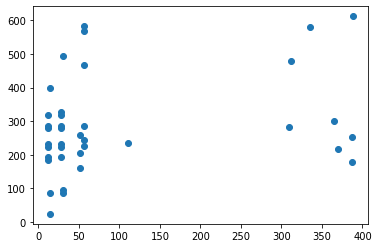

In [33]:
coordinates_x = []
coordinates_y = []
for b in blocks[1:20]:
    coordinates_x.append(b[0])
    coordinates_x.append(b[2])
    coordinates_y.append(b[1])
    coordinates_y.append(b[3])

"""
左下角 右上角
(86.90399932861328,
  803.2255859375,
  231.4759979248047,
  812.2255859375)
"""
import matplotlib.pyplot as plt
plt.scatter(coordinates_x, coordinates_y)

In [39]:
# blocks[0:20]

In [20]:
len(blocks)

77

In [9]:
# [1,2] [2,3]

[1, 2, 2, 3]

In [ ]:
base_path = input("请输入要转换的文件路径：")  # 输入要转换的PDF所在的文件夹
filenames = os.listdir(base_path)　　　　　　# 获取PDF文件列表
for filename in filenames:
    full_path = os.path.join(base_path, filename)  # 拼接，得到PDF文件的绝对路径
    print(full_path)
    doc = fitz.open(full_path)  # 打开一个PDF文件，doc为Document类型，是一个包含每一页PDF文件的列表
    rotate = int(0)  # 设置图片的旋转角度
    zoom_x = 2.0  # 设置图片相对于PDF文件在X轴上的缩放比例
    zoom_y = 2.0  # 设置图片相对于PDF文件在Y轴上的缩放比例
    trans = fitz.Matrix(zoom_x, zoom_y).preRotate(rotate)
    print("%s开始转换..." % filename)
    if doc.pageCount > 1:  # 获取PDF的页数
        for pg in range(doc.pageCount):
            page = doc[pg]  # 获得第pg页
            pm = page.getPixmap(matrix=trans, alpha=False)  # 将其转化为光栅文件（位数）
            new_full_name = full_path.split(".")[0]  # 保证输出的文件名不变
            pm.writeImage("%s%s.jpg" % (new_full_name, pg))  # 将其输入为相应的图片格式，可以为位图，也可以为矢量图
　　　　　　      # 我本来想输出为jpg文件，但是在网页中都是png格式（即调用writePNG），再转换成别的图像文件前，最好查一下是否支持
    else:
        page = doc[0]
        pm = page.getPixmap(matrix=trans, alpha=False)
        new_full_name = full_path.split(".")[0]
        pm.writeImage("%s.jpg" % new_full_name)
    print("%s转换完成！" % filename)

# <center>PyPDF2</center>

In [12]:
from PyPDF2 import PdfFileReader
pdf = PdfFileReader(open(os.getcwd()+"/cases/case55.pdf","rb"))
print(pdf.getNumPages())
for i in range(0, pdf.getNumPages()):
    # logger.info("Processing page {}/{}".format(i + 1, pdf.getNumPages()))
    # images_path.append("./temp/{}.jpg".format(i))
    # process_page(pdf, i, i < args.skip)
    # content = pdf.getPage(i)['/Resources']['/XObject'].getObject()
    page = pdf.getPage(i)
    print(page)

2
{'/Contents': IndirectObject(7, 0), '/MediaBox': [0, 0, 595.3, 841.9], '/Parent': IndirectObject(2, 0), '/Resources': {'/ExtGState': {'/GS13': IndirectObject(13, 0)}, '/Font': {'/FT14': IndirectObject(14, 0), '/FT19': IndirectObject(19, 0), '/FT8': IndirectObject(8, 0)}}, '/Type': '/Page'}
{'/Contents': IndirectObject(26, 0), '/MediaBox': [0, 0, 595.3, 841.9], '/Parent': IndirectObject(2, 0), '/Resources': {'/ExtGState': {'/GS13': IndirectObject(13, 0)}, '/Font': {'/FT14': IndirectObject(14, 0), '/FT19': IndirectObject(19, 0), '/FT8': IndirectObject(8, 0)}}, '/Type': '/Page'}
